<a href="https://colab.research.google.com/github/Frecherenkel60/RandomForestRangers/blob/main/DataMining_RandomForestRangers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
#dataset = pd.read_csv('./data/used_car_prices_original.csv')
dataset = pd.read_csv('./data/used_car_prices_original.csv')
print(dataset.head())

      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic        

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\,'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\,'
/var/folders/yg/mdwldj2j2r3_cpmtlgxkgypw0000gn/T/ipykernel_95690/2898299796.py:2: SyntaxWarning: invalid escape sequence '\$'
  dataset['price'] = dataset['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/yg/mdwldj2j2r3_cpmtlgxkgypw0000gn/T/ipykernel_95690/2898299796.py:5: SyntaxWarning: invalid escape sequence '\,'
  dataset['milage'] = dataset['milage'].replace('[\, mi.]', '', regex=True).astype(float)


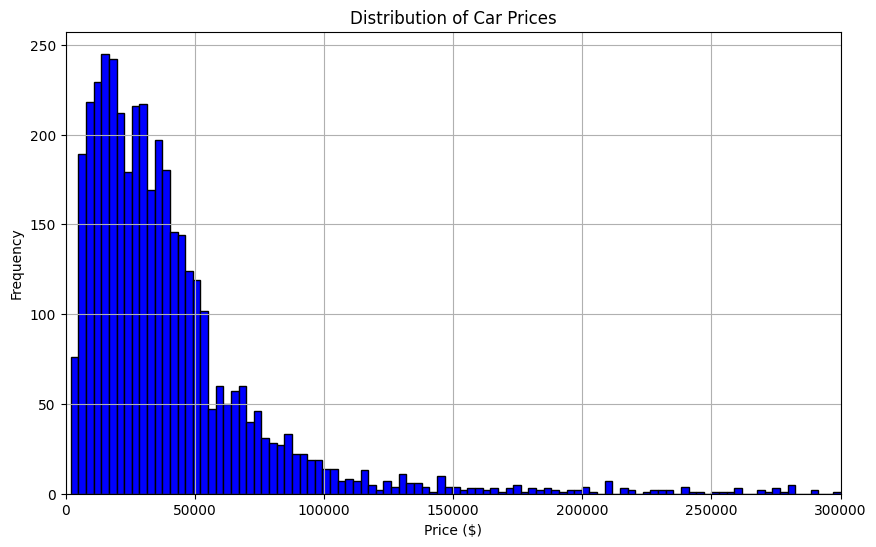

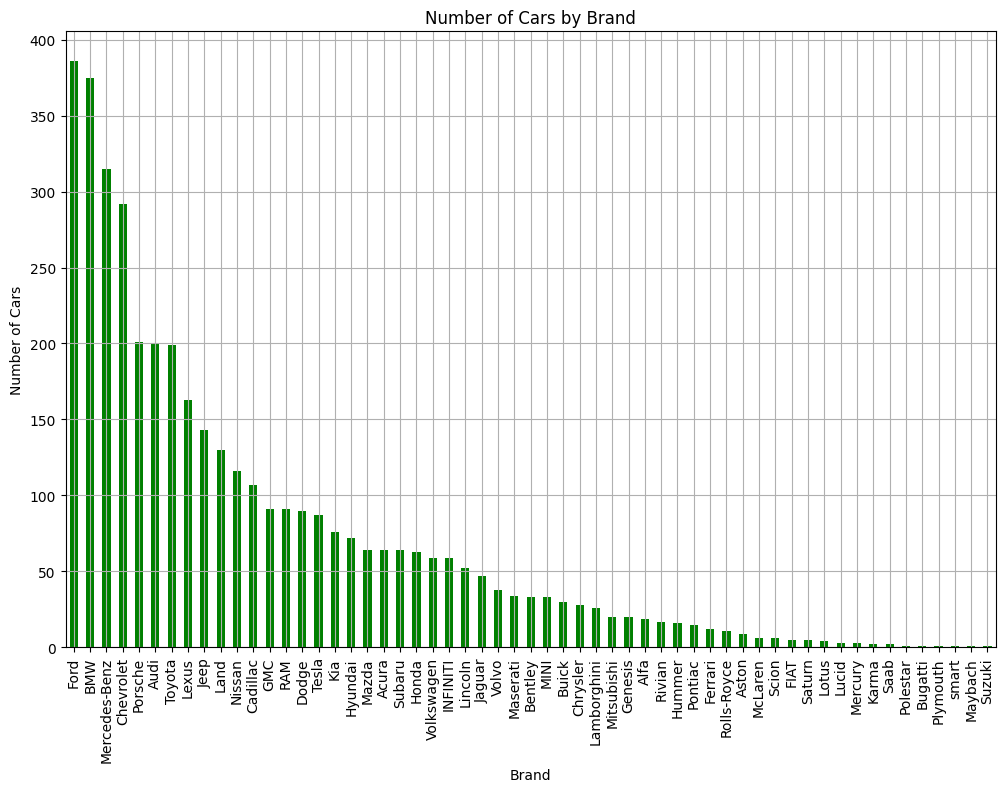

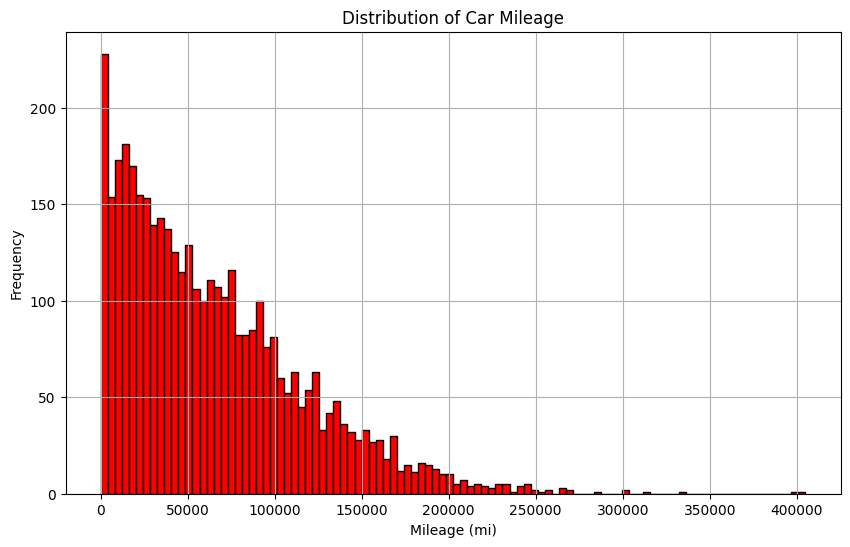

In [95]:
# Convert price to numeric, removing the dollar sign and commas
dataset['price'] = dataset['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert mileage to numeric, removing the ' mi.' and commas
dataset['milage'] = dataset['milage'].replace('[\, mi.]', '', regex=True).astype(float)

# Plot distribution of car prices
plt.figure(figsize=(10, 6))
# Drop rows with missing price values and prices above 80k
# dataset = dataset.dropna(subset=['price'])
# dataset = dataset[dataset['price'] <= 300000]
plt.hist(dataset['price'].dropna(), bins=1000, color='blue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.xlim(0, 300000)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot number of cars by brand
plt.figure(figsize=(12, 8))
dataset['brand'].value_counts().plot(kind='bar', color='green')
plt.title('Number of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

# Plot distribution of mileage
plt.figure(figsize=(10, 6))
plt.hist(dataset['milage'].dropna(), bins=100, color='red', edgecolor='black')
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage (mi)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [99]:
median_price = dataset['price'].median()
average_price = dataset['price'].mean()

print(f"Median Sales Price: ${median_price:.2f}")
print(f"Average Sales Price: ${average_price:.2f}")

Median Sales Price: $31000.00
Average Sales Price: $44553.19


In [100]:
highest_price = dataset['price'].max()
lowest_price = dataset['price'].min()

highest_mileage = dataset['milage'].max()
lowest_mileage = dataset['milage'].min()

print(f"Highest Price: ${highest_price:.2f}")
print(f"Lowest Price: ${lowest_price:.2f}")
print(f"Highest Mileage: {highest_mileage:.2f} mi")
print(f"Lowest Mileage: {lowest_mileage:.2f} mi")

Highest Price: $2954083.00
Lowest Price: $2000.00
Highest Mileage: 405000.00 mi
Lowest Mileage: 100.00 mi


In [101]:
hightest_prices = dataset.nlargest(50, 'price')
print(hightest_prices[['brand', 'model', 'price']])

              brand                            model      price
693        Maserati                Quattroporte Base  2954083.0
229         Bugatti          Veyron 16.4 Grand Sport  1950995.0
3046        Porsche                  Carrera GT Base  1599000.0
1356    Lamborghini               Aventador SVJ Base   749950.0
624     Rolls-Royce                         Cullinan   695000.0
979     Lamborghini               Aventador SVJ Base   649999.0
1615    Rolls-Royce                          Phantom   599995.0
1508    Rolls-Royce                          Phantom   599000.0
3655    Lamborghini                 Aventador S Base   491836.0
1061          Dodge                        Viper GTC   489995.0
1148        Porsche                            911 R   489000.0
304     Rolls-Royce  Phantom Drophead Coupe Drophead   488880.0
2133       Cadillac               Escalade ESV Sport   479995.0
1597        Ferrari               812 Superfast Base   469900.0
487     Rolls-Royce                     